# KNN K-Nearest Neighbours Assingment

In [ ]:
K-Nearest Neighbours
Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
Dataset:
Need to Classify the animal type
Tasks:
1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier.

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


df = pd.read_csv(r'C:\Users\hp\AppData\Local\Temp\efa33ed1-4845-4ea7-bf94-deeea4cc927f_KNN.zip.27f\KNN\Zoo.csv')
X = df.drop('animal name', axis=1)
Y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



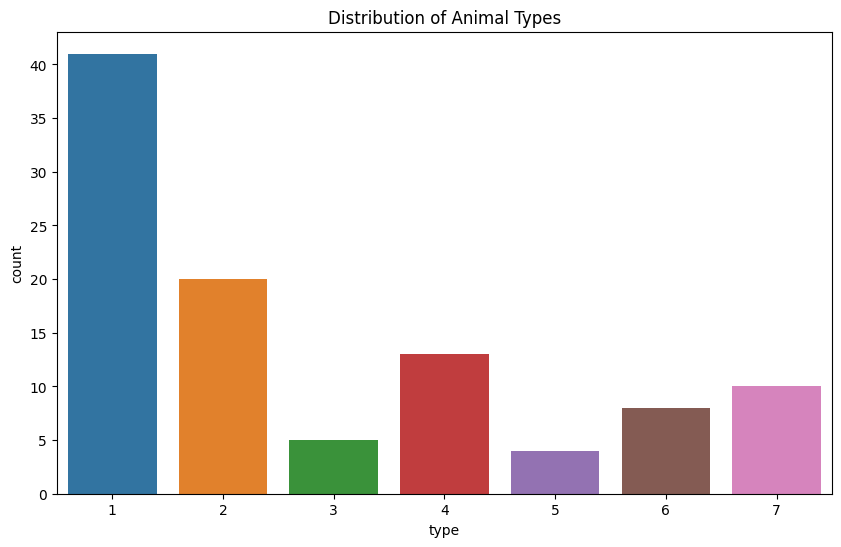

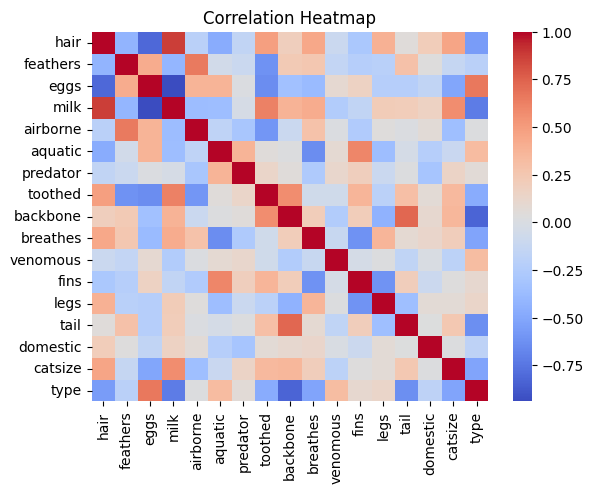

Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


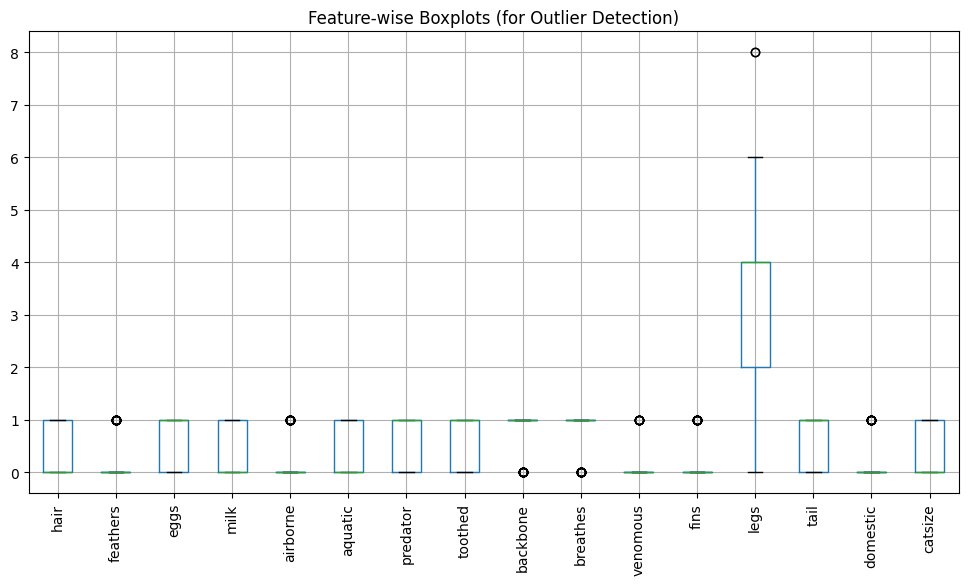

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21


Confusion Matrix:

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

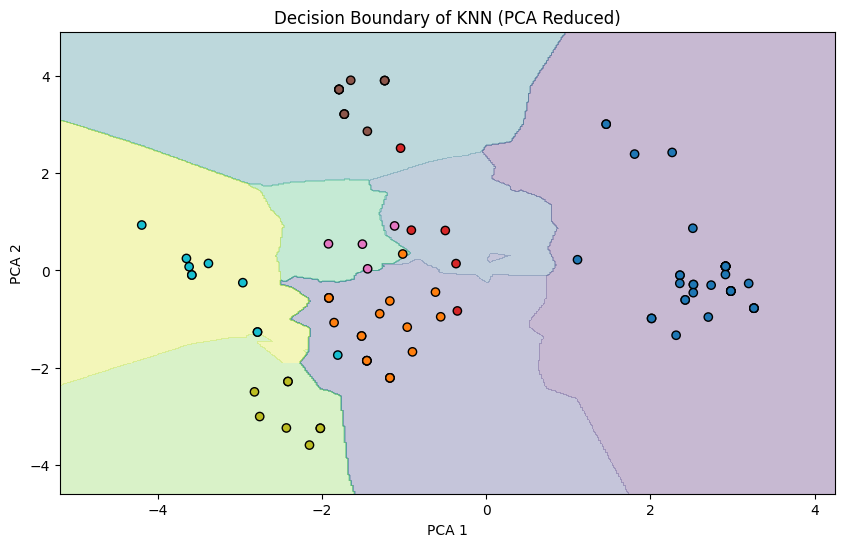

In [10]:
# K-Nearest Neighbors Full Project Code

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r'C:\Users\hp\AppData\Local\Temp\efa33ed1-4845-4ea7-bf94-deeea4cc927f_KNN.zip.27f\KNN\Zoo.csv')

# 1. Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Animal Types')
plt.show()

sns.heatmap(df.drop('animal name', axis=1).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Preprocessing: Handle Missing Values and Outliers (if any)
print("Missing values:\n", df.isnull().sum())  # No missing values

# Outlier detection using boxplot
plt.figure(figsize=(12,6))
df.drop(['animal name', 'type'], axis=1).boxplot(rot=90)
plt.title("Feature-wise Boxplots (for Outlier Detection)")
plt.show()

# 3. Feature & Label Split
X = df.drop(['animal name'], axis=1)
y = df['type']

# . Train-test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Model Training - KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')  # You can try others: 'euclidean', 'manhattan'
knn.fit(X_train, y_train)

# 8. Predictions
y_pred = knn.predict(X_test)

# 6. Evaluation
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# 10. Decision Boundary Visualization (PCA for 2D plot)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scaler.fit_transform(X))
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Plotting decision boundaries
import numpy as np

h = .02
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap='tab10')
plt.title("Decision Boundary of KNN (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
1. What are the key hyperparameters in KNN?
n_neighbors (K value)
metric (distance type like 'minkowski', 'euclidean')
weights (uniform or distance-based)

In [ ]:
2. What distance metrics can be used in KNN?
Euclidean
Manhattan
Minkowski
Hamming (for categorical data)